In [2]:
! pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-2.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached h5py-3

In [8]:
! pip install pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
! pip install matplotlib

  Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.0 MB/s eta 0:00:001.6 MB/s eta 0:00:02
Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.5 MB/s eta 0:00:0031m1.9 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
data_dir = "/home/mahdi/logo_detection_model/detected_logos"

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,          # Normalize pixel values to [0, 1]
    # rotation_range=20,          # Random rotation (in degrees)
    # width_shift_range=0.2,      # Horizontal shift
    # height_shift_range=0.2,     # Vertical shift
    # shear_range=0.2,            # Shear transformation
    # zoom_range=0.2,             # Zoom in/out
    # horizontal_flip=True,       # Random horizontal flip
    # fill_mode="nearest",        # Filling empty pixels after transformation
    validation_split=0.2        # Use 20% of data for validation
)

# Validation generator (no augmentation, just preprocessing)
val_datagen = ImageDataGenerator(
    rescale=1.0 / 255,          # Normalize pixel values
    validation_split=0.2        # Use the same split as train_datagen
)

# Train generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),     # Resize images to 224x224
    batch_size=16,
    class_mode="binary",
    subset="training"
)

# Validation generator
val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode="binary",
    subset="validation"
)

print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")


Found 332 images belonging to 2 classes.
Found 81 images belonging to 2 classes.
Training samples: 332
Validation samples: 81


In [29]:
for  batch,labels in train_generator:
    print(batch.shape, labels.shape)  # Verify batch dimensions
    print(labels)
    break


(16, 224, 224, 3) (16,)
[1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.]


In [19]:
print(batch[0])

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


# plotting images

In [20]:
import matplotlib.pyplot as plt

val_generator_plot = val_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=2,
    class_mode="binary",
    subset="validation"
)


steps = val_generator.samples // val_generator.batch_size  # Total steps in one epoch
step_count = 0

# Load a batch of data
# for images, labels in val_generator:
#     for i in range(len(labels)):
#         plt.imshow(images[i])  # Display the image
#         plt.axis("off")
#         plt.title(f"Label: {labels[i]}")
#         plt.show()

#     step_count += 1
#     if step_count >= steps:  # Stop after one epoch
#         break


Found 81 images belonging to 2 classes.


### Plot with locations of image

In [21]:
import matplotlib.pyplot as plt


# Train generator
train_generator_plot = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),     # Resize images to 224x224
    batch_size=8,
    class_mode="binary",
    shuffle = False,
    subset="training"
)



# Total steps in one epoch
steps = train_generator_plot.samples // train_generator_plot.batch_size
step_count = 0

# Get filenames from the generator
filenames = train_generator_plot.filenames

# Initialize an image index to track filenames
image_index = 0

# Load a batch of data
# for images, labels in train_generator_plot:
#     for i in range(len(labels)):
#         # Get the name of the current image
#         image_name = filenames[image_index]

#         # Display the image
#         plt.imshow(images[i])
#         plt.axis("off")
#         plt.title(f"Label: {labels[i]}, Name: {image_name}")
#         plt.show()

#         # Increment the image index
#         image_index += 1

#         # Stop when all images are processed
#         if image_index >= len(filenames):
#             break

#     step_count += 1
#     if step_count >= steps or image_index >= len(filenames):  # Stop after one epoch
#         break


Found 332 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0 , MobileNetV2
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
# import PIL

# Load pre-trained EfficientNet
# base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model initially

# Add custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)




lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    verbose=1,
    callbacks=[lr_scheduler]
)


# # Train the model
# history = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=15,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     validation_steps=val_generator.samples // val_generator.batch_size
# )


Epoch 1/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.3411 - loss: 1.3038 - val_accuracy: 0.2840 - val_loss: 0.9123 - learning_rate: 1.0000e-04
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.4394 - loss: 0.9046 - val_accuracy: 0.5062 - val_loss: 0.7210 - learning_rate: 1.0000e-04
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5466 - loss: 0.7840 - val_accuracy: 0.6790 - val_loss: 0.6317 - learning_rate: 1.0000e-04
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.6274 - loss: 0.6533 - val_accuracy: 0.7037 - val_loss: 0.5904 - learning_rate: 1.0000e-04
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6242 - loss: 0.6407 - val_accuracy: 0.7037 - val_loss: 0.5624 - learning_rate: 1.0000e-04
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6944 - loss: 0.6398 - val_accuracy: 0.7284 - val_loss: 0.5399 - learning_rate: 1.0000e-04
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7479 

In [32]:
# Save the fine-tuned model
model.save("/home/mahdi/logo_detection_model/trained_model/mobilenet_finetuned_binary.h5")

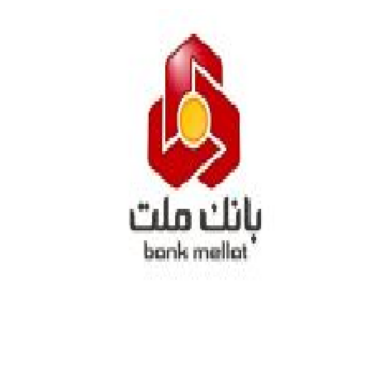

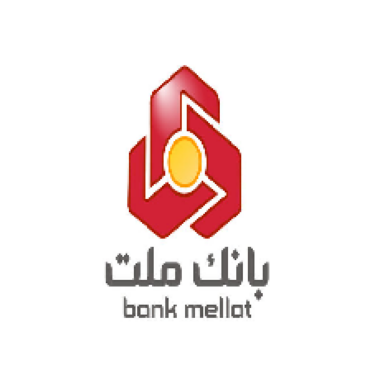

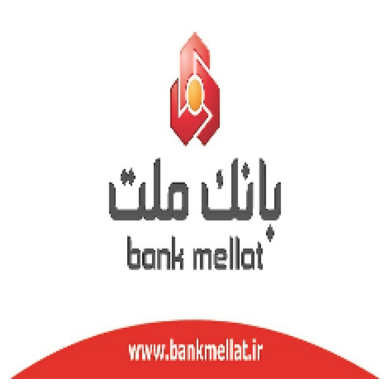

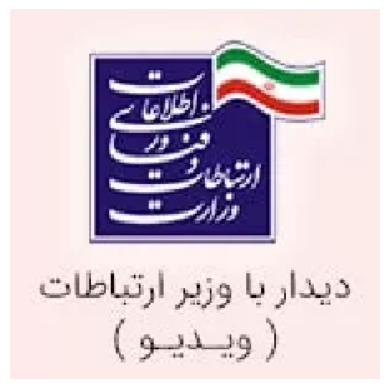

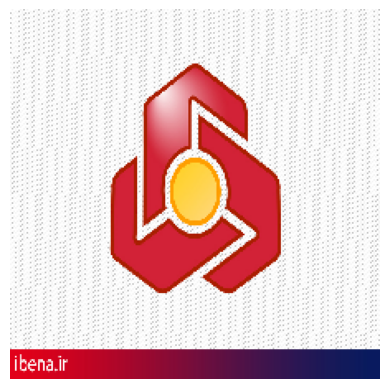

In [33]:
import matplotlib.pyplot as plt

# Plot augmented images safely
augmented_images, _ = next(train_generator)

# Get the actual number of images in the batch
num_images = augmented_images.shape[0]

for i in range(min(5, num_images)):  # Plot up to 5 images or as many as available
    plt.imshow(augmented_images[i])
    plt.axis('off')
    plt.show()


In [34]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the fine-tuned model
# model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Logo_similarity/efficientnet_finetuned_binary.h5")
model = tf.keras.models.load_model("/home/mahdi/logo_detection_model/trained_model/mobilenet_finetuned_binary.h5")
def predict_image(image_path, model):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Bank Mellat Logo", prediction[0][0]
    else:
        return "Not Logo", prediction[0][0]

# Example usage
image_path = "/home/mahdi/logo_detection_model/test_images/291_13.jpg"
result, confidence = predict_image(image_path, model)
print(f"Result: {result}, Confidence: {confidence:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
Result: Bank Mellat Logo, Confidence: 0.7737
